10 simulations of control policies under a random seed

In [1]:
import os
import pandas as pd
import numpy as np

os.chdir('/Users/apple/Desktop/group/data');
countyNumber = 8
farmData=pd.read_csv("Farms_2010_RSG",names=["County Number", "Parish Number", "Holding Number", 
                                               "X Coordinate", "Y Coordinate", "Number of Cattle", 
                                               "Number of Sheep"],delim_whitespace=True)
cumbData = farmData[farmData['County Number'] == countyNumber]
CumbNum=cumbData.index.values+1
CumbFarmNum=len(CumbNum)

In [2]:
# movement data
Movement=pd.read_csv('movements_unique.txt', 
                       names = ["From", "To", "Weight"], delim_whitespace=True)
Movement=np.absolute(Movement);

# take movement from CumbNum to CumbNum
CumbMoveInt=Movement[Movement['From'].isin(CumbNum)]
CumbMove=CumbMoveInt[CumbMoveInt['To'].isin(CumbNum)]

CumbMoveFrom=CumbMove['From'].values.astype(int)
CumbMoveTo=CumbMove['To'].values.astype(int)
CumbMoveW=CumbMove['Weight'].values

In [3]:
#transfer W into a matrix
W=np.zeros((CumbNum[-1]-CumbNum[0]+1,CumbNum[-1]-CumbNum[0]+1))
for i in range(len(CumbMoveFrom)):
    W[CumbMoveFrom[i]-CumbNum[0],CumbMoveTo[i]-CumbNum[0]]=W[CumbMoveFrom[i]-CumbNum[0],CumbMoveTo[i]-CumbNum[0]]+CumbMoveW[i]
CumbMoveOutPerDay=np.sum(W,axis=1)

# 1. no control

In [4]:
duration1=np.array([140, 104, 126, 122, 140, 135, 133, 134, 121, 139])
cullfarmnum1=np.array([4056, 4047, 4077, 4071, 4069, 4050, 4060, 4033, 4036, 4074])
cullsheepnum1=np.array([1800197.0, 1801310.0, 1816378.0, 1806056.0, 1813371.0, 1803285.0, 1810679.0, 1782231.0, 1782382.0, 1815070.0])
cullcattlenum1=np.array([459465.98999999999, 459341.75, 460492.22999999998, 460015.97999999998, 460230.5, 460473.32999999996, 460760.01000000001, 459344.73999999999, 459345.06, 461232.23000000004])
movecount1=np.array([218, 228, 215, 203, 218, 197, 206, 197, 191, 229])

In [5]:
directfarmcost1=cullsheepnum1*320+cullcattlenum1*1200
welfarecost1=0
agsectorloss1=0
exportloss1=401000*(duration1+100)
tourismcost1=0

cost1=directfarmcost1+welfarecost1+agsectorloss1+exportloss1+tourismcost1

# 2. global movement control

In [6]:
duration2=np.array([232, 188, 201, 265, 183, 241, 240, 203, 292, 238])
cullfarmnum2=np.array([4028, 4015, 4019, 4012, 4001, 4000, 4003, 4025, 4037, 3997])
cullsheepnum2=np.array([1785294.0, 1774925.0, 1787753.0, 1779655.0, 1772777.0, 1760370.0, 1772279.0, 1783397.0, 1788989.0, 1780153.0])
cullcattlenum2=np.array([459782.26000000001, 459755.14000000001, 459738.64999999997, 459472.79999999999, 458811.56999999995, 458533.64000000001, 459307.54999999999, 459376.70999999996, 459815.65999999997, 457251.07999999996])
movecount2=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
MoveConsDayV2=np.array([229, 187, 200, 261, 182, 239, 239, 202, 290, 238])

In [7]:
farmdayres2=CumbFarmNum*MoveConsDayV2
animovres2=np.sum(CumbMoveOutPerDay)*MoveConsDayV2
directfarmcost2=cullsheepnum2*320+cullcattlenum2*1200
welfarecost2=farmdayres2*4.9
agsectorloss2=animovres2*139
exportloss2=401000*(duration2+100)
tourismcost2=166*farmdayres2

cost2=directfarmcost2+welfarecost2+agsectorloss2+exportloss2+tourismcost2

# 3. local movement control (radius 0)

In [8]:
duration3=np.array([155, 186, 159, 207, 161, 132, 175, 170, 170, 177])
cullfarmnum3=np.array([4001, 3952, 4026, 3991, 4032, 4004, 4007, 4030, 4017, 4018])
cullsheepnum3=np.array([1754256.0, 1721419.0, 1784642.0, 1765203.0, 1792811.0, 1759525.0, 1773028.0, 1792053.0, 1775347.0, 1769149.0])
cullcattlenum3=np.array([457847.73999999999, 456647.90000000002, 458837.81, 459116.53999999998, 459312.31, 458662.06000000006, 458024.08000000002, 459253.48000000004, 458871.51000000001, 460032.25999999995])
movecount3=np.array([47, 35, 54, 50, 36, 42, 45, 46, 41, 51])
LocalNumMoveBan3=np.array([11958.347874471037, 13189.972524543053, 11429.378014445645, 18195.805371509174, 11951.86294275392, 9117.3643295258262, 11349.334179327245, 13204.506771161747, 12009.427325783441, 11987.191709430541])
LocalFarmBan3=np.array([36076, 35645, 36400, 36046, 36411, 36095, 36153, 36391, 36273, 36250])

In [9]:
farmdayres3=LocalFarmBan3
animovres3=LocalNumMoveBan3
directfarmcost3=cullsheepnum3*320+cullcattlenum3*1200
welfarecost3=farmdayres3*4.9
agsectorloss3=animovres3*139
exportloss3=401000*(duration3+100)
tourismcost3=166*farmdayres3

cost3=directfarmcost3+welfarecost3+agsectorloss3+exportloss3+tourismcost3

# 4. local movement control (radius 1000)

In [10]:
duration4=np.array([174, 185, 163, 161, 153, 226, 162, 148, 176, 165])
cullfarmnum4=np.array([4055, 4023, 4022, 4002, 3980, 4010, 4032, 3985, 3993, 3968])
cullsheepnum4=np.array([1803062.0, 1788248.0, 1791142.0, 1761191.0, 1756509.0, 1774222.0, 1789752.0, 1757051.0, 1757403.0, 1729739.0])
cullcattlenum4=np.array([460492.56, 459799.15999999997, 458266.49999999994, 458360.45999999996, 456668.73999999993, 459611.40000000002, 459889.23999999999, 458020.08999999997, 458966.07999999996, 457887.88])
movecount4=np.array([24, 30, 28, 25, 25, 26, 34, 24, 17, 22])
LocalNumMoveBan4=np.array([13536.051974055343, 13442.843755617943, 10463.336923800838, 11018.224592000444, 8151.5013212794192, 19921.353306290202, 13131.375264408574, 10107.77528261614, 12238.084858753136, 11985.531435882354])
LocalFarmBan4=np.array([76912, 76198, 75328, 75265, 74817, 75547, 75559, 75482, 74920, 75082])

In [11]:
farmdayres4=LocalFarmBan4
animovres4=LocalNumMoveBan4
directfarmcost4=cullsheepnum4*320+cullcattlenum4*1200
welfarecost4=farmdayres4*4.9
agsectorloss4=animovres4*139
exportloss4=401000*(duration4+100)
tourismcost4=166*farmdayres4

cost4=directfarmcost4+welfarecost4+agsectorloss4+exportloss4+tourismcost4

# 5. local movement control (radius 3000)

In [12]:
duration5=np.array([209, 227, 273, 189, 214, 228, 287, 231, 265, 176])
cullfarmnum5=np.array([3976, 4026, 3985, 3983, 4007, 3996, 4006, 3996, 4027, 4049])
cullsheepnum5=np.array([1734376.0, 1798384.0, 1761491.0, 1752256.0, 1781951.0, 1773966.0, 1788700.0, 1748944.0, 1803175.0, 1813017.0])
cullcattlenum5=np.array([457198.31000000006, 458924.18999999994, 458927.17999999999, 458607.06, 460171.32000000001, 459195.16000000003, 457538.26000000001, 458989.22000000003, 460122.10999999999, 460565.15999999997])
movecount5=np.array([0, 3, 3, 2, 4, 2, 1, 6, 5, 5])
LocalNumMoveBan5=np.array([16833.893050443861, 17651.33140170357, 23967.849172877493, 13702.230055057524, 17703.161538541055, 17620.158799311059, 27871.161478068952, 19869.323169431806, 25976.024503150482, 15722.569769406169])
LocalFarmBan5=np.array([157081, 159040, 158255, 157794, 158188, 158878, 156874, 157002, 158969, 160417])

In [13]:
farmdayres5=LocalFarmBan5
animovres5=LocalNumMoveBan5
directfarmcost5=cullsheepnum5*320+cullcattlenum5*1200
welfarecost5=farmdayres5*4.9
agsectorloss5=animovres5*139
exportloss5=401000*(duration5+100)
tourismcost5=166*farmdayres5

cost5=directfarmcost5+welfarecost5+agsectorloss5+exportloss5+tourismcost5

# 6. local movement control (radius 5000)

In [14]:
duration6=np.array([216, 210, 212, 204, 255, 221, 242, 186, 203, 214])
cullfarmnum6=np.array([4009, 3998, 4011, 4023, 4031, 4010, 3981, 3967, 3979, 4012])
cullsheepnum6=np.array([1763409.0, 1779725.0, 1762495.0, 1786960.0, 1790817.0, 1780834.0, 1730553.0, 1737028.0, 1750413.0, 1781334.0])
cullcattlenum6=np.array([458673.67999999999, 457081.87, 458870.14999999997, 458589.80999999994, 459945.33000000007, 459198.54000000004, 457719.16000000003, 456613.81, 458198.72999999998, 459158.80999999994])
movecount6=np.array([2, 0, 1, 1, 3, 4, 2, 4, 2, 0])
LocalNumMoveBan6=np.array([16558.917709846031, 15231.38347086636, 18434.451945132761, 19217.934132017439, 20675.772479099596, 19958.835497779666, 19828.819060072772, 14780.706761149839, 17586.495785956966, 17996.657427205071])
LocalFarmBan6=np.array([211550, 211861, 212419, 212105, 211422, 214632, 209851, 212588, 214949, 214097])

In [15]:
farmdayres6=LocalFarmBan6
animovres6=LocalNumMoveBan6
directfarmcost6=cullsheepnum6*320+cullcattlenum6*1200
welfarecost6=farmdayres6*4.9
agsectorloss6=animovres6*139
exportloss6=401000*(duration6+100)
tourismcost6=166*farmdayres6

cost6=directfarmcost6+welfarecost6+agsectorloss6+exportloss6+tourismcost6

# 7. local movement control(radius based on farm size, min=1000, max=5000)

In [16]:
duration7=np.array([184, 193, 196, 205, 182, 151, 198, 197, 209, 199])
cullfarmnum7=np.array([4001, 4029, 4013, 3995, 3963, 3983, 3966, 3974, 3999, 4008])
cullsheepnum7=np.array([1762266.0, 1781002.0, 1770092.0, 1768299.0, 1726856.0, 1766452.0, 1719116.0, 1749898.0, 1760428.0, 1760577.0])
cullcattlenum7=np.array([458308.94, 459622.08000000002, 459009.22999999998, 458676.81999999995, 458690.23999999999, 456181.07999999996, 457003.64000000001, 457399.45000000007, 458208.40000000002, 459790.51000000001])
movecount7=np.array([22, 17, 17, 18, 17, 14, 13, 18, 5, 14])
LocalNumMoveBan7=np.array([14254.158819435122, 13846.09306834205, 17079.30400815605, 13532.693070110527, 13105.224579731037, 11227.18349523164, 15573.317715548168, 14848.553335955246, 17715.840990651261, 16091.835520543074])
LocalFarmBan7=np.array([90345, 90547, 90324, 90531, 89771, 90406, 89852, 89432, 90122, 90369])

In [17]:
farmdayres7=LocalFarmBan7
animovres7=LocalNumMoveBan7
directfarmcost7=cullsheepnum7*320+cullcattlenum7*1200
welfarecost7=farmdayres7*4.9
agsectorloss7=animovres7*139
exportloss7=401000*(duration7+100)
tourismcost7=166*farmdayres7

cost7=directfarmcost7+welfarecost7+agsectorloss7+exportloss7+tourismcost7

# 8. local movement control(radius based on farm size, min=0, max=10000)

In [18]:
duration8=np.array([251, 174, 159, 194, 222, 187, 178, 162, 187, 204])
cullfarmnum8=np.array([4015, 3969, 3980, 3992, 4004, 3969, 3962, 4013, 3982, 4022])
cullsheepnum8=np.array([1792644.0, 1736496.0, 1758769.0, 1750027.0, 1763270.0, 1729124.0, 1733272.0, 1781049.0, 1752569.0, 1795695.0])
cullcattlenum8=np.array([459002.16000000003, 457956.66000000003, 456941.5, 457926.25, 459373.22999999998, 457006.80000000005, 456909.15999999997, 459626.69999999995, 457971.32999999996, 458605.67000000004])
movecount8=np.array([16, 25, 20, 29, 22, 30, 31, 26, 23, 20])
LocalNumMoveBan8=np.array([20393.353303412612, 13665.956082773118, 11003.594455425335, 15259.673881968763, 18601.325916940379, 14138.51772451274, 14533.772516285158, 11866.342395394227, 14235.328682446945, 17683.427291862059])
LocalFarmBan8=np.array([74693, 75496, 75478, 75497, 74658, 74997, 76095, 76552, 74754, 76883])

In [19]:
farmdayres8=LocalFarmBan8
animovres8=LocalNumMoveBan8
directfarmcost8=cullsheepnum8*320+cullcattlenum8*1200
welfarecost8=farmdayres8*4.9
agsectorloss8=animovres8*139
exportloss8=401000*(duration8+100)
tourismcost8=166*farmdayres8

cost8=directfarmcost8+welfarecost8+agsectorloss8+exportloss8+tourismcost8

# 9. ring cull (radius 1000)

In [20]:
duration9=np.array([128, 158, 143, 109, 124, 159, 133, 145, 136, 141])
cullfarmnum9=np.array([4208, 4180, 4229, 4181, 4228, 4179, 4237, 4179, 4189, 4159])
cullsheepnum9=np.array([1774936.0, 1743851.0, 1804964.0, 1742353.0, 1808056.0, 1763370.0, 1803861.0, 1769633.0, 1755364.0, 1738169.0])
cullcattlenum9=np.array([457332.32999999996, 457846.22999999998, 458531.14999999997, 455225.65000000002, 459952.15000000002, 457613.82000000001, 460254.06000000006, 454370.45999999996, 458098.67000000004, 455396.81000000006])
movecount9=np.array([175, 160, 168, 183, 160, 171, 184, 171, 148, 156])

In [21]:
directfarmcost9=cullsheepnum9*320+cullcattlenum9*1200
welfarecost9=0
agsectorloss9=0
exportloss9=401000*(duration9+100)
tourismcost9=0

cost9=directfarmcost9+welfarecost9+agsectorloss9+exportloss9+tourismcost9

# 10. ring cull (radius 3000)

In [22]:
duration10=np.array([113, 131, 148, 9, 155, 118, 33, 41, 166, 129])
cullfarmnum10=np.array([3984, 3852, 3690, 30, 3870, 3710, 150, 263, 3203, 3836])
cullsheepnum10=np.array([1619587.0, 1519976.0, 1463225.0, 14850.0, 1515016.0, 1471494.0, 71199.0, 38319.0, 1283367.0, 1510086.0])
cullcattlenum10=np.array([436051.95999999996, 432227.17999999993, 415791.72999999998, 2106.0900000000001, 430537.05000000005, 413941.58999999997, 12031.330000000002, 40117.159999999996, 367993.15000000002, 426488.27000000002])
movecount10=np.array([78, 60, 59, 0, 75, 62, 2, 2, 48, 68])

In [23]:
directfarmcost10=cullsheepnum10*320+cullcattlenum10*1200
welfarecost10=0
agsectorloss10=0
exportloss10=401000*(duration10+100)
tourismcost10=0

cost10=directfarmcost10+welfarecost10+agsectorloss10+exportloss10+tourismcost10

# 11. ring cull (radius 5000)

In [24]:
duration11=np.array([13, 102, 17, 99, 117, 118, 19, 10, 113, 100])
cullfarmnum11=np.array([131, 3520, 120, 2326, 2962, 3011, 195, 102, 2404, 3529])
cullsheepnum11=np.array([56732.0, 1397658.0, 14795.0, 758810.0, 1063560.0, 1154601.0, 71524.0, 22970.0, 829814.0, 1372637.0])
cullcattlenum11=np.array([10824.92, 397971.76999999996, 18788.029999999999, 292290.58999999997, 357698.07999999996, 348722.53999999998, 29387.739999999998, 13777.76, 296538.85999999999, 402687.82999999996])
movecount11=np.array([0, 42, 0, 19, 31, 33, 1, 0, 22, 35])

In [25]:
directfarmcost11=cullsheepnum11*320+cullcattlenum11*1200
welfarecost11=0
agsectorloss11=0
exportloss11=401000*(duration11+100)
tourismcost11=0

cost11=directfarmcost11+welfarecost11+agsectorloss11+exportloss11+tourismcost11

# 12. ring cull (time priority, radius 3000, limited resource 50)

In [26]:
duration12=np.array([6, 129, 148, 136, 162, 191, 130, 151, 156, 164])
cullfarmnum12=np.array([34, 4227, 4242, 4240, 4196, 4309, 4221, 4264, 4232, 4254])
cullsheepnum12=np.array([9790.0, 1835886.0, 1838793.0, 1835643.0, 1761149.0, 1839304.0, 1841200.0, 1815465.0, 1840064.0, 1837172.0])
cullcattlenum12=np.array([2095.1599999999999, 461976.23999999999, 462232.47999999998, 462164.48999999999, 455144.09000000003, 462399.72999999998, 462311.58999999997, 461831.15000000002, 461870.33000000007, 461465.48999999999])
movecount12=np.array([0, 202, 173, 162, 130, 174, 192, 163, 175, 163])

In [27]:
directfarmcost12=cullsheepnum12*320+cullcattlenum12*1200
welfarecost12=0
agsectorloss12=0
exportloss12=401000*(duration12+100)
tourismcost12=0

cost12=directfarmcost12+welfarecost12+agsectorloss12+exportloss12+tourismcost12

# 13. ring cull (size priority, radius 3000, limited resource 50)

In [28]:
duration13=np.array([122, 166, 21, 156, 149, 165, 145, 145, 162, 126])
cullfarmnum13=np.array([4191, 4253, 37, 4257, 4234, 4246, 4243, 4233, 4259, 4234])
cullsheepnum13=np.array([1833086.0, 1781799.0, 26900.0, 1828256.0, 1809241.0, 1824315.0, 1826643.0, 1833533.0, 1821798.0, 1838201.0])
cullcattlenum13=np.array([461366.80999999994, 458574.98000000004, 1196.0900000000001, 461582.39000000001, 460833.82000000007, 460815.73999999999, 460621.75, 461555.07000000001, 462044.56000000006, 462212.97999999998])
movecount13=np.array([189, 115, 0, 165, 166, 139, 146, 177, 155, 185])

In [29]:
directfarmcost13=cullsheepnum13*320+cullcattlenum13*1200
welfarecost13=0
agsectorloss13=0
exportloss13=401000*(duration13+100)
tourismcost13=0

cost13=directfarmcost13+welfarecost13+agsectorloss13+exportloss13+tourismcost13

# 14. ring cull (neighbour priority, radius 3000, limited resource 50)

In [30]:
duration14=np.array([166, 165, 155, 137, 152, 133, 167, 145, 154, 152])
cullfarmnum14=np.array([4252, 4233, 4220, 4241, 4240, 4204, 4306, 4249, 4257, 4220])
cullsheepnum14=np.array([1828971.0, 1797644.0, 1770530.0, 1837187.0, 1810884.0, 1830286.0, 1816684.0, 1829689.0, 1827607.0, 1821480.0])
cullcattlenum14=np.array([460639.47999999998, 457364.48999999999, 459617.23999999999, 461912.57000000007, 460456.40000000002, 461490.06, 461631.39000000001, 461494.45999999996, 460001.47999999998, 459806.65000000002])
movecount14=np.array([132, 126, 135, 159, 127, 169, 147, 179, 157, 182])

In [31]:
directfarmcost14=cullsheepnum14*320+cullcattlenum14*1200
welfarecost14=0
agsectorloss14=0
exportloss14=401000*(duration14+100)
tourismcost14=0

cost14=directfarmcost14+welfarecost14+agsectorloss14+exportloss14+tourismcost14

In [32]:
import matplotlib.pyplot as plt 

In [33]:
data_to_plot_cost = [cost1,cost2,cost3,cost4,cost5,cost6,cost7,cost8,cost9,cost10,cost11,cost12,cost13,cost14]

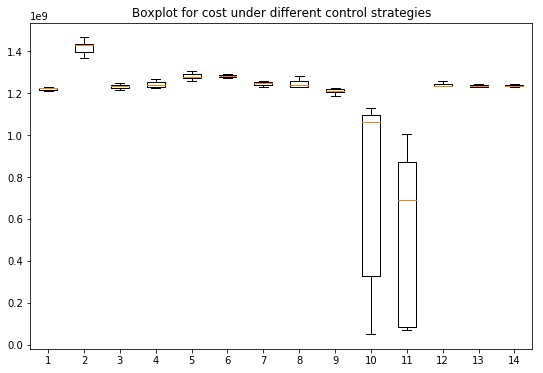

In [34]:
plt.figure(1, figsize=(9, 6))
plt.boxplot(data_to_plot_cost,0,'')
plt.title('Boxplot for cost under different control strategies')
plt.show()

In [35]:
data_to_plot_cost2 = [cost1,cost2,cost3,cost4,cost5,cost6,cost7,cost8,cost12,cost13,cost14]

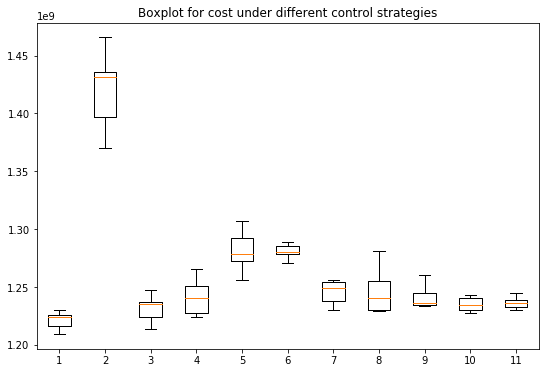

In [36]:
plt.figure(1, figsize=(9, 6))
plt.boxplot(data_to_plot_cost2,0,'')
plt.title('Boxplot for cost under different control strategies')
plt.show()

# 15. No movement ban

In [ ]:
duration15=np.array([13, 55, 20, 65, 18, 51, 265, 23, 16, 228, 251, 55, 279, 263, 254, 256, 27, 263, 16, 268, 268, 277, 13, 18, 242, 32, 237, 249, 16, 247, 11, 13, 240, 242, 235, 32, 240, 44, 23, 11, 235, 18, 23, 20, 16, 212, 216, 34, 209, 226])
cullfarmnum15=np.array([46, 222, 86, 262, 84, 181, 3413, 63, 36, 1638, 3281, 256, 3284, 3425, 3318, 3263, 110, 3384, 47, 3237, 3348, 3291, 21, 67, 3115, 66, 3058, 3132, 34, 3099, 34, 28, 3085, 2968, 2946, 146, 2948, 232, 58, 33, 2887, 49, 66, 55, 54, 2776, 2777, 68, 2757, 2789])
cullsheepnum15=np.array([25634.0, 22298.0, 40389.0, 34238.0, 23654.0, 49380.0, 1773944.0, 25388.0, 26546.0, 573209.0, 1743693.0, 69207.0, 1700162.0, 1787582.0, 1777808.0, 1772545.0, 72498.0, 1790951.0, 13089.0, 1759332.0, 1767692.0, 1790053.0, 2963.0, 8527.0, 1774365.0, 29025.0, 1766936.0, 1770892.0, 7677.0, 1766818.0, 8526.0, 7026.0, 1769180.0, 1758184.0, 1749568.0, 25289.0, 1753970.0, 70227.0, 20659.0, 4207.0, 1727912.0, 14456.0, 10963.0, 9421.0, 14288.0, 1727545.0, 1739880.0, 37141.0, 1745368.0, 1745697.0])
cullcattlenum15=np.array([4245.5900000000001, 41644.240000000005, 11284.65, 41233.239999999998, 6542.0, 23412.73, 448241.01000000001, 4373.25, 1193.5799999999999, 207645.56, 445717.48999999999, 32628.209999999999, 444399.04999999999, 453122.70999999996, 451490.36000000004, 449909.68999999994, 17420.48, 453951.56999999995, 1803.1700000000001, 448698.08000000002, 451444.70000000001, 452493.5, 1075.6599999999999, 8971.0699999999997, 450091.62, 4922.6599999999999, 448722.70999999996, 450338.07000000001, 2497.8299999999999, 449465.10999999999, 3782.75, 1898.0, 451222.57000000001, 447419.73999999999, 447346.52000000002, 15113.26, 448987.25, 36066.279999999999, 5261.0599999999995, 2488.3400000000001, 445198.34999999998, 5425.3899999999994, 9442.6700000000001, 1981.9899999999998, 2824.9099999999999, 446313.77999999997, 447726.32000000001, 5139.6800000000003, 448373.58000000002, 448290.54999999999])
movecount15=np.array([0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 2, 4, 8, 2, 0, 3, 0, 5, 8, 7, 0, 0, 3, 0, 3, 2, 0, 4, 0, 0, 2, 5, 5, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 2, 6, 0, 2, 4])